In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import os
import numpy as np 
import pandas as pd

In [ ]:
import torch
import matplotlib.pyplot as plt
import os
import numpy as np
from mlpmixer import MLPMixer  # Import your MLPMixer model
'''
# Path to the trained model
model_path = "/home/ethan/IFT6135/IFT6135-2025/HW1_2025/assignment1_release/mlpmixer_trained.pth"
logdir = "/home/ethan/IFT6135/IFT6135-2025/HW1_2025/assignment1_release/plots/Q4_6"

# Ensure directory exists
os.makedirs(logdir, exist_ok=True)

# Define the model architecture (must match the trained model's config)
mlp_mixer = MLPMixer(
    num_classes=10,
    img_size=32,
    patch_size=4,
    embed_dim=512,
    num_blocks=6,
    drop_rate=0.0,
    activation="gelu"
)

# Load trained weights correctly
state_dict = torch.load(model_path, map_location=torch.device('cpu'))
mlp_mixer.load_state_dict(state_dict)
mlp_mixer.eval()  # Set model to evaluation mode

# 1) Retrieve the first MixerBlock
first_block = mlp_mixer.blocks[0]

# 2) Get the
'''

/tmp/ipykernel_88354/1919680309.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path, map_location=torch.device('cpu'))


Visualization saved to /home/ethan/IFT6135/IFT6135-2025/HW1_2025/assignment1_release/plots/Q4_6/mlpmixer_token_mixing_fc1.png


/tmp/ipykernel_98114/1978147195.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path, map_location=torch.device('cpu'))


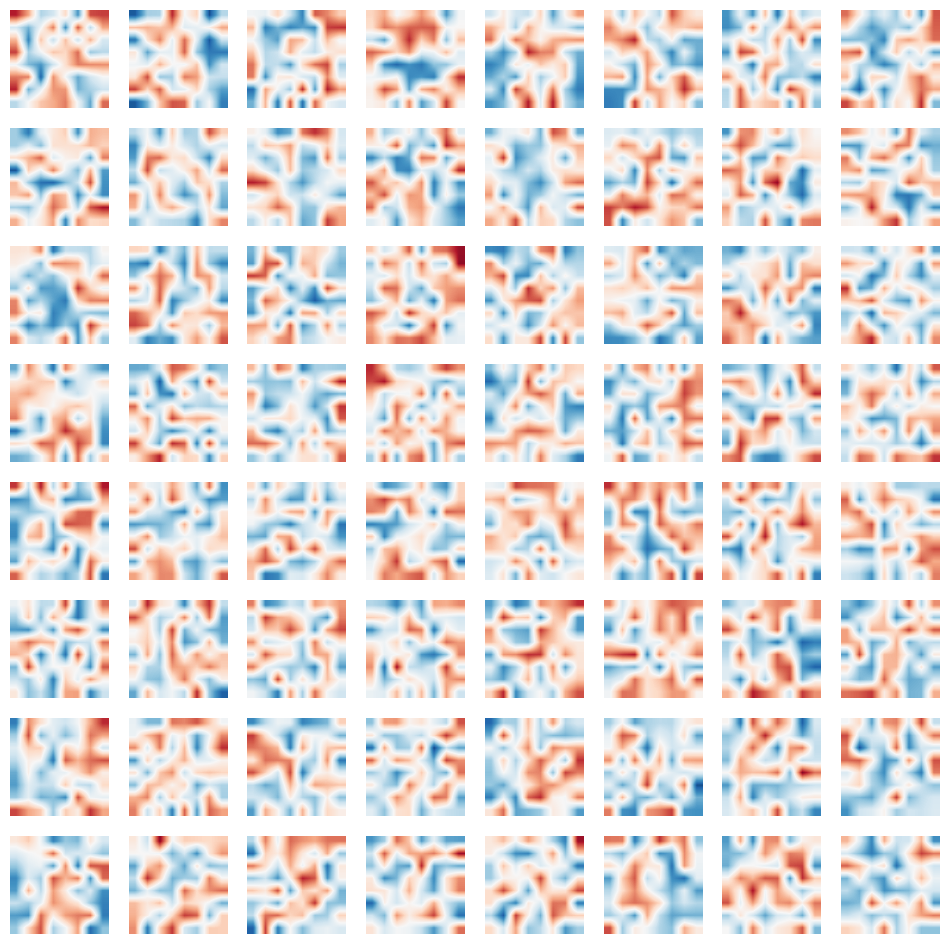

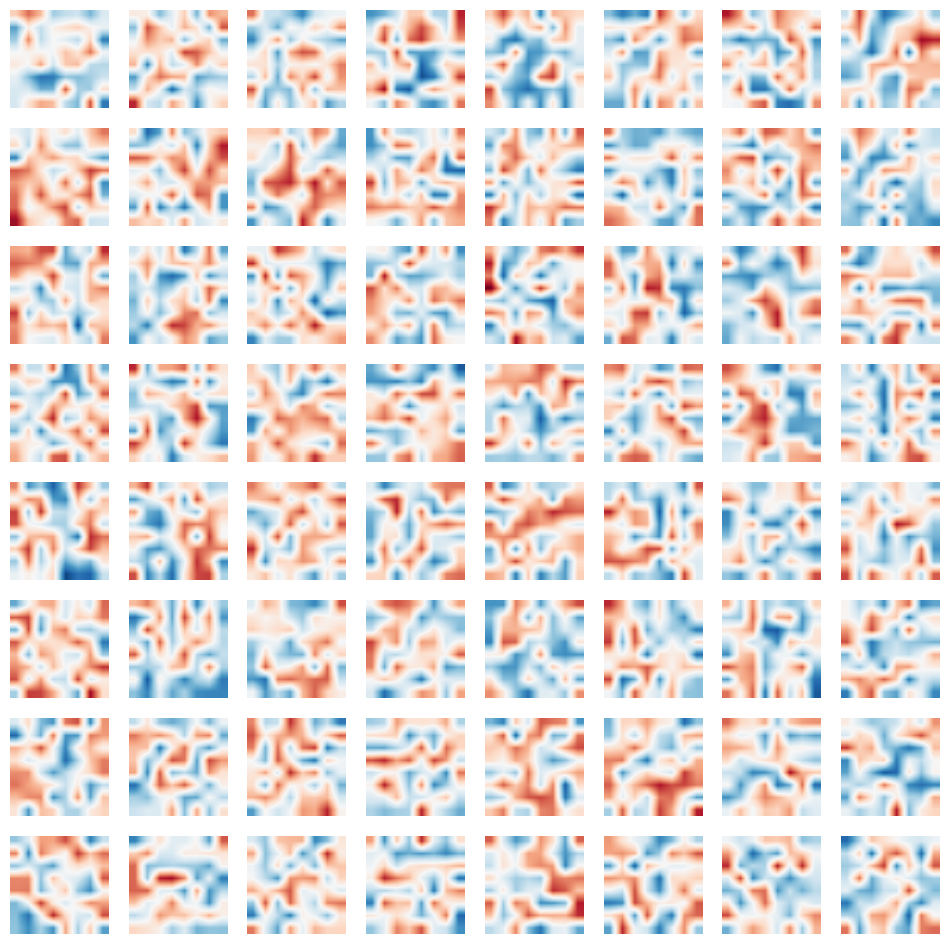

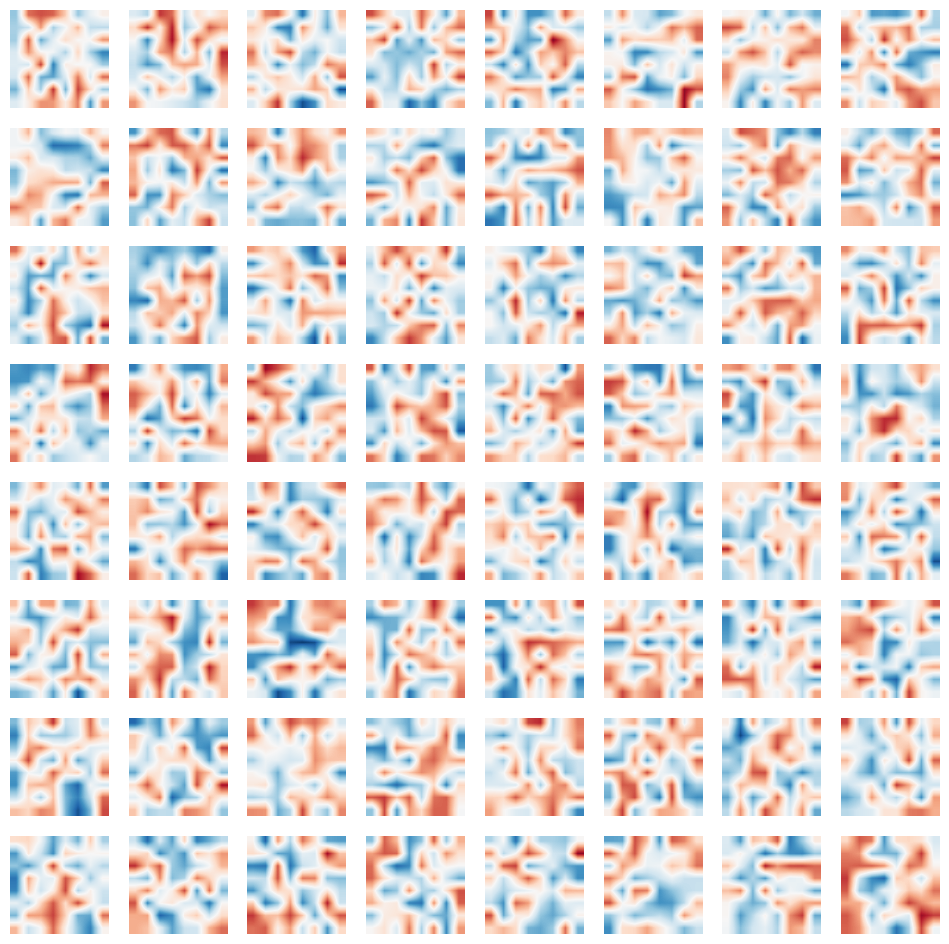

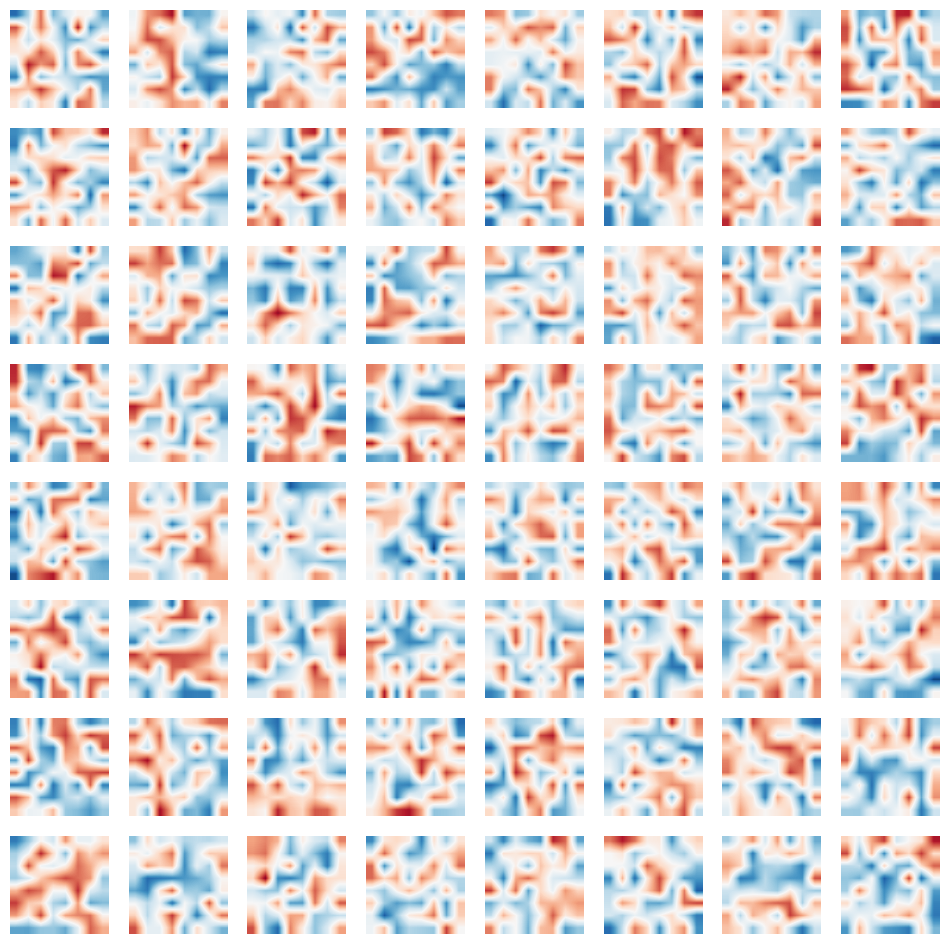

In [18]:
import torch
import matplotlib.pyplot as plt
import os
import numpy as np
from mlpmixer import MLPMixer  # Import your MLPMixer model
from matplotlib.colors import Normalize

# Path where the trained model is saved
model_path = "/home/ethan/IFT6135/IFT6135-2025/HW1_2025/assignment1_release/mlpmixer_trained.pth"
logdir = "/home/ethan/IFT6135/IFT6135-2025/HW1_2025/assignment1_release/plots/Q4_6"

# Ensure directory exists
os.makedirs(logdir, exist_ok=True)

# Define the model architecture to match the trained model
mlp_mixer = MLPMixer(
    num_classes=10,
    img_size=32,
    patch_size=4,
    embed_dim=512,
    num_blocks=6,
    drop_rate=0.0,
    activation='gelu'
)

# Load trained weights
state_dict = torch.load(model_path, map_location=torch.device('cpu'))
mlp_mixer.load_state_dict(state_dict)
mlp_mixer.eval()  # Set model to evaluation mode

weights = mlp_mixer.blocks[0].mlp_tokens.fc1.weight.detach()
weights_min, weights_max = weights.min().item(), weights.max().item()
norm = Normalize(vmin=weights_min, vmax=weights_max)

plt.figure(figsize=(12,12))

for i in range(64):

    plt.subplot(8,8,i+1)
    plt.imshow(weights[i].cpu().reshape(8,8), cmap='RdBu', norm=norm, interpolation='bilinear')
    
    plt.axis('off')

plt.savefig("/home/ethan/IFT6135/IFT6135-2025/HW1_2025/assignment1_release/plots/Q4_6/mlpmixer_token_mixing_1-64.png")

plt.figure(figsize=(12,12))

for i in range(64,128):

    plt.subplot(8,8,i-63)
    plt.imshow(weights[i].cpu().reshape(8,8), cmap='RdBu', norm=norm, interpolation='bilinear')
    plt.axis('off')

plt.savefig("/home/ethan/IFT6135/IFT6135-2025/HW1_2025/assignment1_release/plots/Q4_6/mlpmixer_token_mixing_64-128.png")

plt.figure(figsize=(12,12))
for i in range(128,192):

    plt.subplot(8,8,i-127)
    plt.imshow(weights[i].cpu().reshape(8,8), cmap='RdBu', norm=norm, interpolation='bilinear')
    plt.axis('off')

plt.savefig("/home/ethan/IFT6135/IFT6135-2025/HW1_2025/assignment1_release/plots/Q4_6/mlpmixer_token_mixing_128-192.png")

plt.figure(figsize=(12,12))
for i in range(192,256):

    plt.subplot(8,8,i-191)
    plt.imshow(weights[i].cpu().reshape(8,8), cmap='RdBu', norm=norm, interpolation='bilinear')
    plt.axis('off')

plt.savefig("/home/ethan/IFT6135/IFT6135-2025/HW1_2025/assignment1_release/plots/Q4_6/mlpmixer_token_mixing_192-256.png")

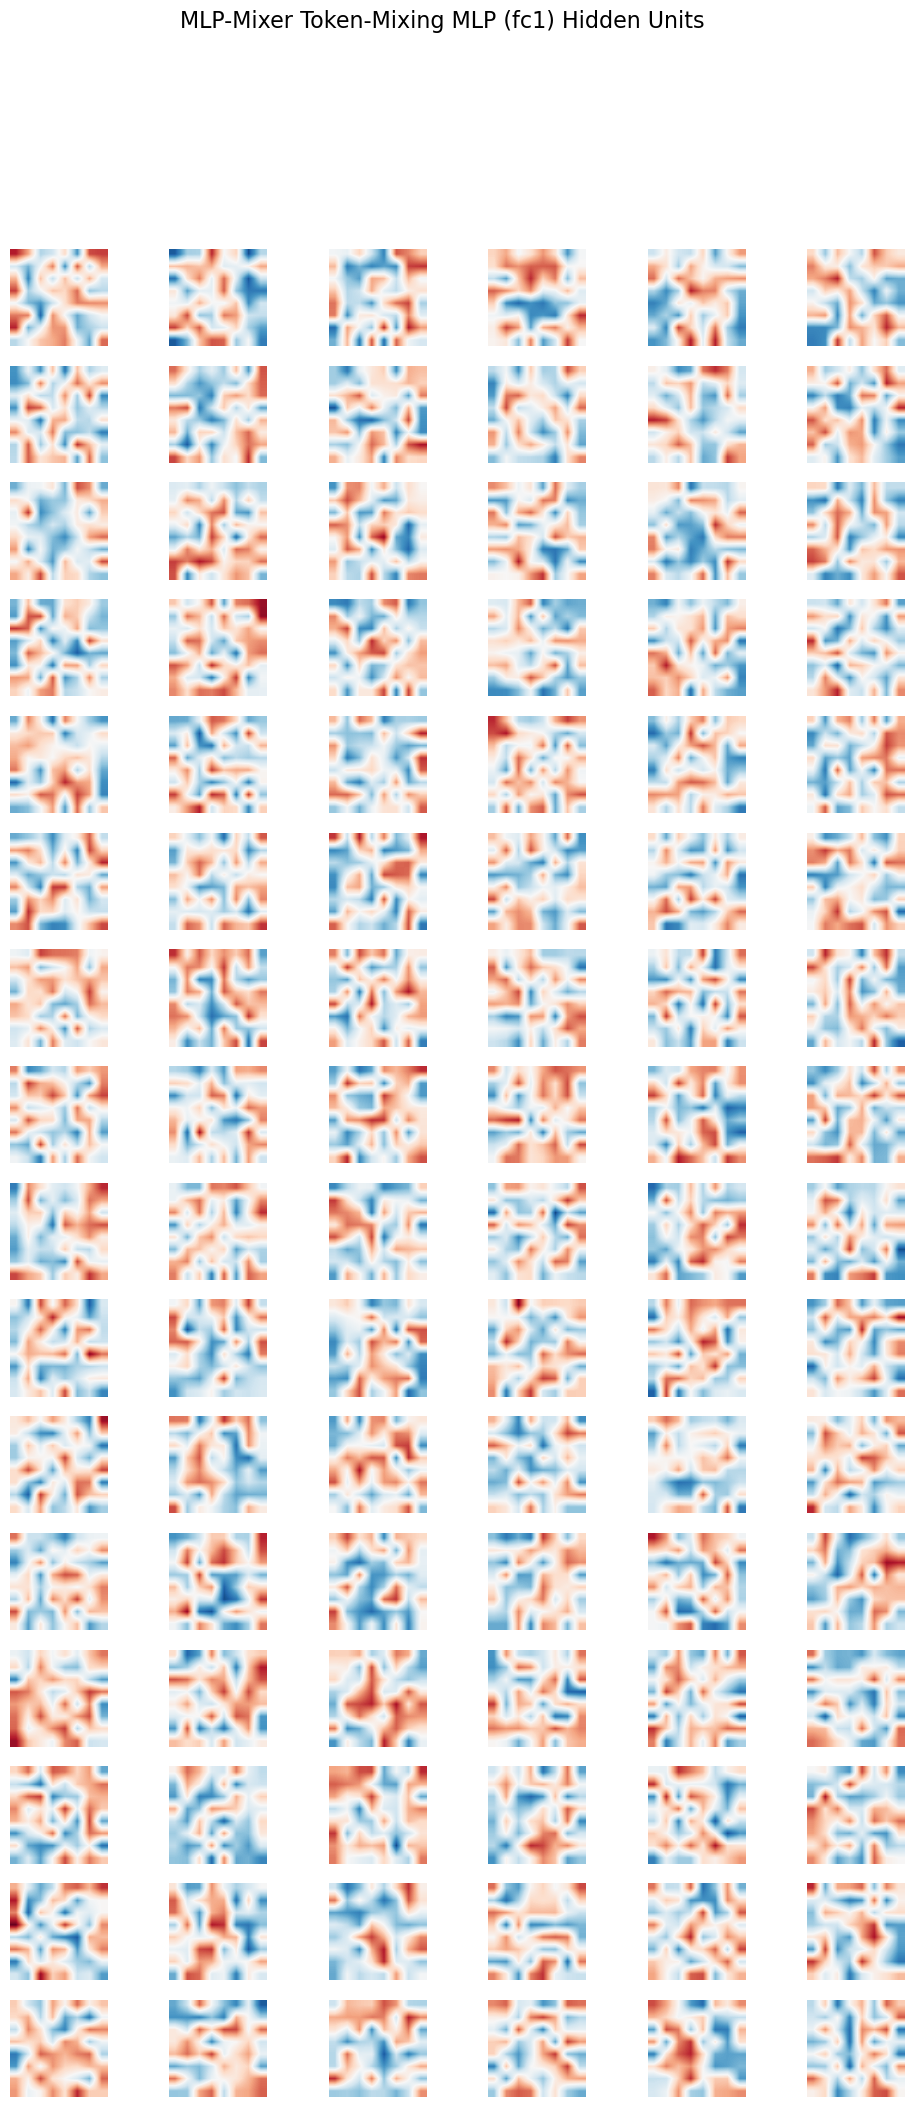

In [12]:
fig, axes = plt.subplots(nrows=16, ncols=6, figsize=(12, 24))  # 16 rows, 6 columns

fig.suptitle("MLP-Mixer Token-Mixing MLP (fc1) Hidden Units", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < 256:
        # Reshape each hidden unit’s weights into 8×8
        img = weights[i].reshape(8, 8)
        ax.imshow(img, cmap="RdBu", norm=norm, interpolation="bilinear")
    ax.axis("off")
plt.show()
# Save the figure
#save_path = os.path.join(logdir, "mlpmixer_token_mixing_fc1_16x6.png")
#plt.savefig(save_path, bbox_inches="tight", dpi=300)
#plt.close()

In [ ]:
from resnet18 import ResNet18
import torch

model = ResNet18(num_classes=10)
model.eval()  # Set to evaluation mode if needed
model.load_state_dict(torch.load("/home/ethan/IFT6135/IFT6135-2025/HW1_2025/assignment1_release/resnet18_trained", map_location=torch.device('cpu')))

model.visualize()



/tmp/ipykernel_88354/3316803593.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/home/ethan/IFT6135/IFT6135-2025/HW1_2025/assignment1_r

In [8]:
from resnet18 import ResNet18
import torch
import matplotlib.pyplot as plt
import torchvision.utils as vutils

# Assume state_dict is already defined and loaded
model = ResNet18(num_classes=10)
model.load_state_dict(state_dict)

# Clone the conv1 filters (expected shape: [64, 3, 3, 3])
filters = model.conv1.weight.data.clone()

# Average over the RGB channels to obtain a single channel (grayscale)
filters = filters.mean(dim=1, keepdim=True)  # new shape: [64, 1, 3, 3]

# Normalize the filter values to [0, 1]
filters = (filters - filters.min()) / (filters.max() - filters.min())

# Create a grid of filters. Even though our filters are single-channel, 
# make_grid returns a 3-channel tensor (with repeated channels).
grid = vutils.make_grid(filters, nrow=8, normalize=True, padding=2)

plt.figure(figsize=(10, 10))
grid_np = grid.cpu().numpy()  # shape: (3, H, W)
# Take one channel (they're identical) to get a grayscale image.
grid_gray = grid_np[0, :, :]   # shape: (H, W)
plt.imshow(grid_gray, cmap="gray")
plt.axis("off")


plt.savefig("/home/ethan/IFT6135/IFT6135-2025/HW1_2025/assignment1_release/plots/Q4_5/resnet18_filters_gray.png")
plt.close()

In [5]:
model.visualize()

# Assignment 1

In [ ]:
'''
#@title Mount your Google Drive
# If you run this notebook locally or on a cluster (i.e. not on Google Colab)
# you can delete this cell which is specific to Google Colab. You may also
# change the paths for data/logs in Arguments below.
%matplotlib inline
%load_ext autoreload
%autoreload 2

from google.colab import drive
drive.mount('/content/gdrive')
'''

In [2]:
'''
#@title Link your assignment folder & install requirements
#@markdown Enter the path to the assignment folder in your Google Drive
# If you run this notebook locally or on a cluster (i.e. not on Google Colab)
# you can delete this cell which is specific to Google Colab. You may also
# change the paths for data/logs in Arguments below.
import sys
import os
import shutil
import warnings

folder = "Your path to assignment folder" #@param {type:"string"}
!ln -Ts "$folder" /content/assignment 2> /dev/null

# Add the assignment folder to Python path
if '/content/assignment' not in sys.path:
  sys.path.insert(0, '/content/assignment')
  '''
# Check if CUDA is available
import torch
import warnings
if not torch.cuda.is_available():
  warnings.warn('CUDA is not available.')
else:
  print('CUDA is available')

CUDA is available


### Running on GPU
For this assignment, it will be necessary to run your experiments on GPU. To make sure the notebook is running on GPU, you can change the notebook settings with
* (EN) `Edit > Notebook Settings`
* (FR) `Modifier > Paramètres du notebook`


In [3]:
%matplotlib inline
import warnings

from dataclasses import dataclass
import torch
from torch import optim
from torchvision.datasets import CIFAR10
from torchvision import transforms
from utils import seed_experiment, to_device, cross_entropy_loss, compute_accuracy
from config import get_config_parser
import json
from mlp import MLP
from resnet18 import ResNet18
from mlpmixer import MLPMixer
from tqdm import tqdm
from torch.utils.data import DataLoader
import time
import os

# Local Test
Before run the experiment, here are some local test cases you can run for sanity check

In [7]:
import unittest
import my_tests
suite = unittest.TestLoader().loadTestsFromModule(my_tests)
unittest.TextTestRunner(verbosity=2).run(suite)

test_linear_attributes (my_tests.TestLinear.test_linear_attributes) ... ok
test_linear_forward (my_tests.TestLinear.test_linear_forward) ... ok
test_activation (my_tests.TestMLP.test_activation) ... ok
test_forward (my_tests.TestMLP.test_forward) ... ok
test_mlp (my_tests.TestMLP.test_mlp) ... ok
test_mixer_block (my_tests.TestMLPMixer.test_mixer_block) ... ok
test_mlpmixer (my_tests.TestMLPMixer.test_mlpmixer) ... ok
test_patch_emb (my_tests.TestMLPMixer.test_patch_emb) ... ok
test_basic_block (my_tests.TestResNet.test_basic_block) ... ok
test_basic_block2 (my_tests.TestResNet.test_basic_block2) ... ok
test_resnet (my_tests.TestResNet.test_resnet) ... ok
test_ce_loss (my_tests.TestUtils.test_ce_loss) ... ok

----------------------------------------------------------------------
Ran 12 tests in 1.841s

OK


<unittest.runner.TextTestResult run=12 errors=0 failures=0>

## Experiments

Below we define a few default arguments to get you started with your experiments. You are encouraged to modify the function `main_entry()`, as well as these arguments, to fit your needs (e.g. changing hyperparameters, the optimizer, adding regularizations).

In [ ]:
@dataclass
class Arguments:
  # Data
  batch_size: int = 128
  # Model
  model: str = 'mlp'  # [mlp, resnet18, mlpmixer]
  model_config: str = "./model_configs/mlp.json" # path to model config json file

  # Optimization
  optimizer: str = 'adamw'  # [sgd, momentum, adam, adamw]
  epochs: int = 15
  lr: float = 1e-3
  momentum: float = 0.9
  weight_decay: float = 5e-4

  # Experiment
  logdir: str = '/content/assignment/logs'
  seed: int = 42

  # Miscellaneous
  device: str = 'cuda'
  visualize : bool = False
  print_every: int = 80

In [ ]:
# Main code entry. Train the model and save the logs
from main import train, evaluate
def main_entry(args):
    # Check for the device
    if (args.device == "cuda") and not torch.cuda.is_available():
        warnings.warn(
            "CUDA is not available, make that your environment is "
            "running on GPU (e.g. in the Notebook Settings in Google Colab). "
            'Forcing device="cpu".'
        )
        args.device = "cpu"

    if args.device == "cpu":
        warnings.warn(
            "You are about to run on CPU, and might run out of memory "
            "shortly. You can try setting batch_size=1 to reduce memory usage."
        )

    # Seed the experiment, for repeatability
    seed_experiment(args.seed)

    test_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize([0.49139968, 0.48215841, 0.44653091], [0.24703223, 0.24348513, 0.26158784])
                                     ])
    # For training, we add some augmentation. Networks are too powerful and would overfit.
    train_transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                          transforms.RandomResizedCrop((32,32),scale=(0.8,1.0),ratio=(0.9,1.1)),
                                          transforms.ToTensor(),
                                          transforms.Normalize([0.49139968, 0.48215841, 0.44653091], [0.24703223, 0.24348513, 0.26158784])
                                        ])
    # Loading the training dataset. We need to split it into a training and validation part
    # We need to do a little trick because the validation set should not use the augmentation.
    train_dataset = CIFAR10(root='./data', train=True, transform=train_transform, download=True)
    val_dataset = CIFAR10(root='./data', train=True, transform=test_transform, download=True)
    train_set, _ = torch.utils.data.random_split(train_dataset, [45000, 5000])
    _, val_set = torch.utils.data.random_split(val_dataset, [45000, 5000])

    # Loading the test set
    test_set = CIFAR10(root='./data', train=False, transform=test_transform, download=True)
    
    # Load model
    print(f'Build model {args.model.upper()}...')
    if args.model_config is not None:
        print(f'Loading model config from {args.model_config}')
        with open(args.model_config) as f:
            model_config = json.load(f)
    else:
        raise ValueError('Please provide a model config json')
    print(f'########## {args.model.upper()} CONFIG ################')
    for key, val in model_config.items():
        print(f'{key}:\t{val}')
    print('############################################')
    model_cls = {'mlp': MLP, 'resnet18': ResNet18, 'mlpmixer': MLPMixer}[args.model]
    model = model_cls(**model_config)
    model.to(args.device)
    
    # Optimizer
    if args.optimizer == "adamw":
        optimizer = optim.AdamW(
            model.parameters(), lr=args.lr, weight_decay=args.weight_decay
        )
    elif args.optimizer == "adam":
        optimizer = optim.Adam(model.parameters(), lr=args.lr)
    elif args.optimizer == "sgd":
        optimizer = optim.SGD(
            model.parameters(), lr=args.lr, weight_decay=args.weight_decay
        )
    elif args.optimizer == "momentum":
        optimizer = optim.SGD(
            model.parameters(),
            lr=args.lr,
            momentum=args.momentum,
            weight_decay=args.weight_decay,
        )
    
    print(
        f"Initialized {args.model.upper()} model with {sum(p.numel() for p in model.parameters())} "
        f"total parameters, of which {sum(p.numel() for p in model.parameters() if p.requires_grad)} are learnable."
    )

    train_losses, valid_losses = [], []
    train_accs, valid_accs = [], []
    train_times, valid_times = [], []
    
    # We define a set of data loaders that we can use for various purposes later.
    train_dataloader = DataLoader(train_set, batch_size=args.batch_size, shuffle=True, drop_last=True, pin_memory=True, num_workers=4)
    valid_dataloader = DataLoader(val_set, batch_size=args.batch_size, shuffle=False, drop_last=False, num_workers=4)
    test_dataloader = DataLoader(test_set, batch_size=args.batch_size, shuffle=False, drop_last=False, num_workers=4)
    for epoch in range(args.epochs):
        tqdm.write(f"====== Epoch {epoch} ======>")
        loss, acc, wall_time = train(epoch, model, train_dataloader, optimizer,args)
        train_losses.append(loss)
        train_accs.append(acc)
        train_times.append(wall_time)

        loss, acc, wall_time = evaluate(epoch, model, valid_dataloader,args)
        valid_losses.append(loss)
        valid_accs.append(acc)
        valid_times.append(wall_time)

    test_loss, test_acc, test_time = evaluate(
        epoch, model, test_dataloader, args, mode="test"
    )
    print(f"===== Best validation Accuracy: {max(valid_accs):.3f} =====>")

    # Save log if logdir provided
    if args.logdir is not None:
        print(f'Writing training logs to {args.logdir}...')
        os.makedirs(args.logdir, exist_ok=True)
        with open(os.path.join(args.logdir, 'results.json'), 'w') as f:
            f.write(json.dumps(
                {
                    "train_losses": train_losses,
                    "valid_losses": valid_losses,
                    "train_accs": train_accs,
                    "valid_accs": valid_accs,
                    "test_loss": test_loss,
                    "test_acc": test_acc
                },
                indent=4,
            ))
    
        # Visualize
        if args.visualize and args.model in ['resnet18', 'mlpmixer']:
            model.visualize(args.logdir)


In [ ]:
# Example to run MLP with 15 epochs
config = Arguments(model='mlp', 
                   model_config='assignment/model_configs/mlp.json', 
                   epochs=10, logdir="exps/mlp_default")
main_entry(config)